In [1]:
import os
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

In [2]:
raw_dir = '../../data/downloaded_raw'
out_dir = '../../data/processed_dat'

sorted(os.listdir(raw_dir))

['2000census-Table 9 Resident Households by Household Structure and Household Size.xlsx',
 '2000census-Table 9 Resident Households by Household Structure and Household Size_cleaned.csv',
 '2010census-Table 9 Resident Households by Household Structure and Household Size.xlsx',
 '2010census-Table 9 Resident Households by Household Structure and Household Size_cleaned.csv',
 'M830202 - Divorce Rates, Annual.csv',
 'M830202 - Divorce Rates, Annual_cleaned.csv',
 'README.md',
 'agegroup_grooms_brides.csv',
 'agegroup_grooms_brides.ods',
 'death_rate_agespecific.csv',
 'death_rate_agespecific_cleaned.csv',
 'demographic_ethnicity.csv',
 'input_birth_fertility_rates_sin_1961-2018.csv',
 'input_birth_fertility_rates_sin_1961-2018_cleaned.csv',
 'input_birth_number_by_age_1980-2018.csv',
 'input_birth_number_by_order_sin_1967-2018.csv',
 'input_lifetable_sin_2003-2017.csv',
 'input_marriage_rates_sin_1980-2017.csv',
 'input_marriage_rates_sin_1980-2017_cleaned.csv',
 'input_marriage_rates_sin_1

In [24]:
df0 = pd.read_csv(os.path.join(raw_dir, 'demographic_ethnicity.csv'))
df0 = df0[df0['Ethnicity']=='All']
df0 = df0[df0['Gender']=='Both']
df0

,Ethnicity,Gender,Variables,1990,1991,1992,1993,1994,1995,1996,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,All,Both,0 - 4 Years,224049,235519,245751,248771,247022,248089,245148,...,197788,194432,188249,186673,183295,181369,183575,187160,187653,185528
1,All,Both,5 - 9 Years,205628,205807,204724,210359,223824,230583,242270,...,221435,215675,208119,206324,205704,205790,204452,201509,200575,199066
2,All,Both,10 - 14 Years,198476,201155,202170,206698,207032,209583,209322,...,248628,244302,240536,233320,226244,220796,214388,207495,206253,206530
3,All,Both,15 - 19 Years,223305,218157,213331,204085,200002,199898,202379,...,262775,263750,260738,258861,255066,247337,242902,239771,232973,226520
4,All,Both,20 - 24 Years,238987,234658,234805,237867,239253,237425,231764,...,241753,247190,255069,264506,266889,263918,264127,260854,259072,255516
5,All,Both,25 - 29 Years,290940,289839,286490,281789,273264,267010,263481,...,274308,272639,262606,254582,255615,265659,271030,279988,290198,291631
6,All,Both,30 - 34 Years,298323,304022,306029,307731,309334,308824,309094,...,297240,298687,297555,295396,296870,292287,290619,285544,279340,281397
7,All,Both,35 - 39 Years,255993,269191,281688,291778,300133,307434,313266,...,317311,320024,316161,313970,305503,302029,301067,301998,300956,303720
8,All,Both,40 - 44 Years,206063,224210,231002,240317,250783,260994,273686,...,312983,309441,306614,308823,312581,316023,316755,313445,311484,303640
9,All,Both,45 - 49 Years,128439,129004,147384,166332,183764,208085,225769,...,322497,323459,323991,320925,316336,308533,303413,301183,303457,307838


In [25]:
def interpolation(midyears, popsize):
    x_news = []
    y_news = []
    for i in range(18):
        tempx = []
        tempy = []
        if i-1>=0:
            tempx.append(midyears[i-1])
            tempy.append(popsize[i-1])
        tempx.append(midyears[i])
        tempy.append(popsize[i])
        if i+1<=17:
            tempx.append(midyears[i+1])
            tempy.append(popsize[i+1])
        else:
            tempx.append(101)
            tempy.append(0)
            
        z = np.polyfit(tempx, tempy, 1)
        f = np.poly1d(z)
        if i<17:
            x_new = [ float(x) for x in list(range(int(midyears[i]-2), int(midyears[i]+3))) ]
        else:
            x_new = [ float(x) for x in list(range(int(midyears[i]-2), int(midyears[i]+14))) ]
        y_new = f(x_new)
        x_news.extend(x_new)
        y_news.extend(y_new)
    miny = abs(min(y_news))
    y_news = [ y+miny for y in y_news ]
    return x_news, y_news

#def check

In [27]:
midyears = [ i*5.+2. for i in range(18) ]
midyears_ex = [ i*5.+2. for i in range(-1,21) ]

popsize =  [ y/5. for y in df0['2000'].tolist()]
x_news, y_news = interpolation(midyears, popsize)

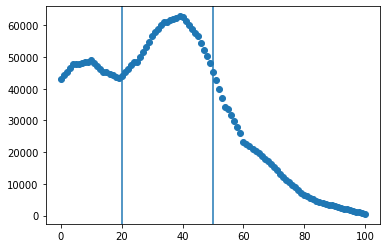

In [30]:
fig, ax = plt.subplots()
ax.scatter(x_news, y_news)
ax.axvline(x=20)
ax.axvline(x=50)


In [33]:
cn = sum([ int(y) for x,y in zip(x_news, y_news) if x<=20 ])
an = sum([ int(y) for x,y in zip(x_news, y_news) if 20<x<=50 ])
rn = sum([ int(y) for x,y in zip(x_news, y_news) if 50<x ])
cn, an, rn

(968300, 1657292, 678228)

# use the above number as constrain of number of people in each age group

In [3]:
df0_2000 = pd.read_csv(os.path.join(raw_dir, '2000census-Table 9 Resident Households by Household Structure and Household Size_cleaned.csv'))
df0_2000 = df0_2000.replace('-', 0)
numcol = ['Total', '1 Person', '2 Persons', '3 Persons', '4 Persons', '5 Persons', '6 Persons', '7 Persons', '8 Or More Persons']
target_col = ['1 Person', '2 Persons', '3 Persons', '4 Persons', '5 Persons', '6 Persons', '7 Persons', '8 Or More Persons']
df0_2000 = df0_2000.astype({col: 'float' for col in numcol})
df0_2000#[numcol[0]].dtypes
df0_2000.dtypes

Family Structure        object
Household Structure     object
Total                  float64
1 Person               float64
2 Persons              float64
3 Persons              float64
4 Persons              float64
5 Persons              float64
6 Persons              float64
7 Persons              float64
8 Or More Persons      float64
dtype: object

In [4]:
total = float(df0_2000['Total'][0])

df1_2000 = df0_2000.copy()
for i in df0_2000.index:
    row = df0_2000.loc[i]
    for col in numcol:
        val = row[col]
        #if col=='Total': print(i, val/total)
        df1_2000.at[i, col] = float(val)/total
df1_2000

,Family Structure,Household Structure,Total,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 Persons,7 Persons,8 Or More Persons
0,Total,Total,1.000000,0.082384,0.171827,0.191376,0.255090,0.178908,0.078162,0.027390,0.014863
1,No Family Nucleus,Subtotal,0.124393,0.082384,0.030021,0.007735,0.002666,0.000964,0.000363,0.000123,0.000138
2,No Family Nucleus,One Person,0.082384,0.082384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,No Family Nucleus,Two Or More Persons,0.042009,0.000000,0.030021,0.007735,0.002666,0.000964,0.000363,0.000123,0.000138
4,One Family Nucleus,Subtotal,0.819722,0.000000,0.141806,0.183641,0.244928,0.165232,0.063057,0.015804,0.005254
5,One Family Nucleus,One Generation,0.106228,0.000000,0.095685,0.007846,0.001850,0.000507,0.000234,0.000055,0.000051
6,One Family Nucleus,Two Generations,0.648273,0.000000,0.046110,0.171875,0.228679,0.142773,0.046179,0.009645,0.003012
7,One Family Nucleus,Three Or More Generations,0.065221,0.000000,0.000010,0.003920,0.014400,0.021953,0.016643,0.006104,0.002190
8,Two Family Nuclei,Subtotal,0.053791,0.000000,0.000000,0.000000,0.007495,0.012712,0.014560,0.011096,0.007927
9,Two Family Nuclei,One Or Two Generations,0.015089,0.000000,0.000000,0.000000,0.005972,0.004754,0.002625,0.001085,0.000653


In [5]:
df1_2000.columns

Index(['Family Structure', 'Household Structure', 'Total', '1 Person',
       '2 Persons', '3 Persons', '4 Persons', '5 Persons', '6 Persons',
       '7 Persons', '8 Or More Persons'],
      dtype='object')

In [6]:
temp = df1_2000[['Household Structure', '1 Person', '2 Persons', '3 Persons', '4 Persons', '5 Persons', '6 Persons', '7 Persons', '8 Or More Persons']]
temp.iat[-1,0] = 'Three Or More Family Nuclei'
temp = temp[temp['Household Structure']!='Subtotal']
temp = temp[temp['Household Structure']!='Total']
temp = temp.reset_index(drop=True)
print(temp['Household Structure'])
temp = temp[['1 Person', '2 Persons', '3 Persons', '4 Persons', '5 Persons', '6 Persons', '7 Persons', '8 Or More Persons']]
temp

0                     One Person
1            Two Or More Persons
2                 One Generation
3                Two Generations
4      Three Or More Generations
5         One Or Two Generations
6      Three Or More Generations
7    Three Or More Family Nuclei
Name: Household Structure, dtype: object


,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 Persons,7 Persons,8 Or More Persons
0,0.082384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.030021,0.007735,0.002666,0.000964,0.000363,0.000123,0.000138
2,0.000000,0.095685,0.007846,0.001850,0.000507,0.000234,0.000055,0.000051
3,0.000000,0.046110,0.171875,0.228679,0.142773,0.046179,0.009645,0.003012
4,0.000000,0.000010,0.003920,0.014400,0.021953,0.016643,0.006104,0.002190
5,0.000000,0.000000,0.000000,0.005972,0.004754,0.002625,0.001085,0.000653
6,0.000000,0.000000,0.000000,0.001523,0.007959,0.011935,0.010010,0.007274
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000182,0.000367,0.001545


In [7]:
nuclei = ['No Family Nucleus', 'No Family Nucleus', 'One Family Nucleus', 'One Family Nucleus', 'One Family Nucleus', 'Two Family Nuclei', 'Two Family Nuclei', 'Two Family Nuclei']
temphs = df1_2000['Household Structure'].tolist()
temphs = [ h for h in temphs if h!='Total' ]
temphs = [ h for h in temphs if h!='Subtotal' ]
#temphs = [ '{} - {}'.format(a,b) for a,b in zip(nuclei, temphs) ]
temphs

['One Person',
 'Two Or More Persons',
 'One Generation',
 'Two Generations',
 'Three Or More Generations',
 'One Or Two Generations',
 'Three Or More Generations']

In [8]:
temphs = ['$1P$',
 '$\geq 2P$',
 '$1G$',
 '$2G$',
 '$\geq 3G$',
 '$\leq 2G$',
 '$\geq 3G$', 
 '$\geq 3FN$']
len(temphs)

8

In [9]:
xs = temp.index.tolist()
ys = list(range(1,9))
xs, ys

([0, 1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8])

In [10]:
xxs = []
yys = []
zzs = []
#zero_xxs = []
#zero_yys = []
for x in xs:
    for y in ys:
        xxs.append(x)
        yys.append(y)
        zzs.append(temp.iat[x,y-1]*1000)


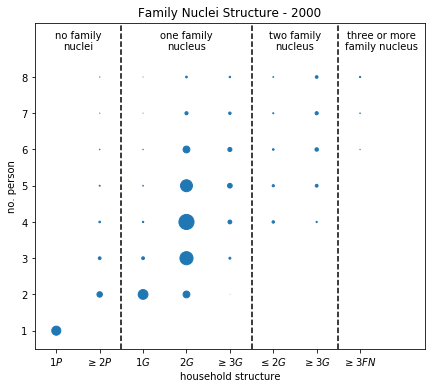

In [11]:
fig, ax = plt.subplots(figsize=(7, 6))
ax.scatter(xxs, yys, s=zzs)
ax.set_xlim([-0.5,8.5])
ax.set_xticks(list(range(0,8)))
ax.set_xticklabels(temphs)
ax.axvline(x=1.5, ls='--', c='k')
ax.axvline(x=4.5, ls='--', c='k')
ax.axvline(x=6.5, ls='--', c='k')
ax.set_ylim([0.5,9.5])
ax.set_yticks(list(range(1,9)))
ax.annotate('no family\nnuclei', xy=(0.5, 9), xycoords='data', ha='center', va='center')
ax.annotate('one family\nnucleus', xy=(3, 9), xycoords='data', ha='center', va='center')
ax.annotate('two family\nnucleus', xy=(5.5, 9), xycoords='data', ha='center', va='center')
ax.annotate('three or more\nfamily nucleus', xy=(7.5, 9), xycoords='data', ha='center', va='center')
ax.set_ylabel('no. person')
ax.set_xlabel('household structure')
ax.set_title('Family Nuclei Structure - 2000')
plt.savefig('family_nuclei_2000.png', dpi=92, bbox_inches='tight')

In [40]:
temphs

['$1P$',
 '$\\geq 2P$',
 '$1G$',
 '$2G$',
 '$\\geq 3G$',
 '$\\leq 2G$',
 '$\\geq 3G$',
 '$\\geq 3FN$']

In [ ]:
xlabs = [('0FN, 1')]

In [39]:
print(sum(zzs)/1000.)
for x,y,z in zip(xxs, yys, zzs):
    print(x,y,z/1000.)


0.9999999999999999
0 1 0.0823842463582817
0 2 0.0
0 3 0.0
0 4 0.0
0 5 0.0
0 6 0.0
0 7 0.0
0 8 0.0
1 1 0.0
1 2 0.030021090821667814
1 3 0.00773475832978177
1 4 0.002666404397381678
1 5 0.0009638396223322297
1 6 0.0003628058442339005
1 7 0.00012348512168202034
1 8 0.00013769137461888995
2 1 0.0
2 2 0.095684577473254
2 3 0.007846222775901824
2 4 0.001850091247855402
2 5 0.0005070539509774995
2 6 0.0002338567791146226
2 7 5.4639434372575374e-05
2 8 5.1361068310220854e-05
3 1 0.0
3 2 0.04611021866701636
3 3 0.17187489755106056
3 4 0.22867914631347735
3 5 0.14277284201553944
3 6 0.046179064354325804
3 7 0.009644952955447005
3 8 0.0030117256226163546
4 1 0.0
4 2 9.835098187063567e-06
4 3 0.003919833021888557
4 4 0.014399676534548515
4 5 0.021953031942213333
4 6 0.01664317170988646
4 7 0.006104317608104121
4 8 0.002189948529652821
5 1 0.0
5 2 0.0
5 3 0.0
5 4 0.005972090176922488
5 5 0.004753630790414058
5 6 0.002624878427258521
5 7 0.001085139166639347
5 8 0.0006534876350960015
6 1 0.0
6 2 0.0

# Family Structure

## No Family Nucleus

In [41]:
def make_dic(com):
    com2 = {}
    for gen, v in com.items():
        for cou, cs in v.items():
            com2[(gen, cou)] = {}
            for st in cs:
                com2[(gen, cou)][st] = 0.0
            if len(com2[(gen, cou)])==0:
                del com2[(gen, cou)]
    return com2

# Family Structure

## No Family Nucleus
def com_zero():
    comp = {'one':{c:[] for c in range(1,9)}, 'two':{c:[] for c in range(1,9)}}

    for i in range(9):
        for j in range(9):
            k = 0 # k must be zero because young people must be dependent and attach to one (or two) parent(s)
            if (i+j+k<9) and (i+j+k>0):
                alist = [i,j,k]
                atuple = (i,j,k)
                c = sum(alist)
                if alist.count(0)==2:
                    comp['one'][c].append(atuple)
                elif alist.count(0)==1:
                    comp['two'][c].append(atuple)
    return make_dic(comp)

## One Family Nucleus
def com_one():
    comp = {'one':{c:[] for c in range(1,9)}, 'two':{c:[] for c in range(1,9)}, 'three':{c:[] for c in range(1,9)}}

    for i in range(9):
        for j in range(9):
            for k in range(9):
                if (i+j+k<9) and (i+j+k>0):
                    alist = [i,j,k]
                    atuple = (i,j,k)
                    c = sum(alist)
                    if alist.count(0)==2:
                        if k>0: continue
                        comp['one'][c].append(atuple)
                    elif alist.count(0)==1:
                        comp['two'][c].append(atuple)
                    elif alist.count(0)==0:
                        comp['three'][c].append(atuple)
    return make_dic(comp)

## Two Family Nuclei
def com_two():
    comp = {'one':{c:[] for c in range(1,9)}, 'two':{c:[] for c in range(1,9)}, 'three':{c:[] for c in range(1,9)}}

    for i in range(9):
        for j in range(9):
            for k in range(9):
                if (i+j+k<9) and (i+j+k>0):
                    alist = [i,j,k]
                    atuple = (i,j,k)
                    c = sum(alist)
                    if c<=1: continue
                    if alist.count(0)==2:
                        if k>0: continue
                        comp['one'][c].append(atuple)
                    elif alist.count(0)==1:
                        comp['two'][c].append(atuple)
                    elif alist.count(0)==0:
                        comp['three'][c].append(atuple)
    return make_dic(comp)


## Three Or More Family Nuclei
def com_more():
    comp = {'one':{c:[] for c in range(1,9)}, 'two':{c:[] for c in range(1,9)}, 'three':{c:[] for c in range(1,9)}}

    for i in range(9):
        for j in range(9):
            for k in range(9):
                if (i+j+k<9) and (i+j+k>0):
                    alist = [i,j,k]
                    atuple = (i,j,k)
                    c = sum(alist)
                    if c<=2: continue
                    if alist.count(0)==2:
                        if k>0: continue
                        comp['one'][c].append(atuple)
                    elif alist.count(0)==1:
                        comp['two'][c].append(atuple)
                    elif alist.count(0)==0:
                        comp['three'][c].append(atuple)
    return make_dic(comp)

In [42]:
com_more()

{('one', 3): {(0, 3, 0): 0.0, (3, 0, 0): 0.0},
 ('one', 4): {(0, 4, 0): 0.0, (4, 0, 0): 0.0},
 ('one', 5): {(0, 5, 0): 0.0, (5, 0, 0): 0.0},
 ('one', 6): {(0, 6, 0): 0.0, (6, 0, 0): 0.0},
 ('one', 7): {(0, 7, 0): 0.0, (7, 0, 0): 0.0},
 ('one', 8): {(0, 8, 0): 0.0, (8, 0, 0): 0.0},
 ('two', 3): {(0, 1, 2): 0.0,
  (0, 2, 1): 0.0,
  (1, 0, 2): 0.0,
  (1, 2, 0): 0.0,
  (2, 0, 1): 0.0,
  (2, 1, 0): 0.0},
 ('two', 4): {(0, 1, 3): 0.0,
  (0, 2, 2): 0.0,
  (0, 3, 1): 0.0,
  (1, 0, 3): 0.0,
  (1, 3, 0): 0.0,
  (2, 0, 2): 0.0,
  (2, 2, 0): 0.0,
  (3, 0, 1): 0.0,
  (3, 1, 0): 0.0},
 ('two', 5): {(0, 1, 4): 0.0,
  (0, 2, 3): 0.0,
  (0, 3, 2): 0.0,
  (0, 4, 1): 0.0,
  (1, 0, 4): 0.0,
  (1, 4, 0): 0.0,
  (2, 0, 3): 0.0,
  (2, 3, 0): 0.0,
  (3, 0, 2): 0.0,
  (3, 2, 0): 0.0,
  (4, 0, 1): 0.0,
  (4, 1, 0): 0.0},
 ('two', 6): {(0, 1, 5): 0.0,
  (0, 2, 4): 0.0,
  (0, 3, 3): 0.0,
  (0, 4, 2): 0.0,
  (0, 5, 1): 0.0,
  (1, 0, 5): 0.0,
  (1, 5, 0): 0.0,
  (2, 0, 4): 0.0,
  (2, 4, 0): 0.0,
  (3, 0, 3): 0.0,
 

## zero family nucleus

In [14]:
com = com_zero()
comp_zero = {}
for k,v in com.items():
    gen,cou = k
    if cou not in comp_zero: comp_zero[cou] = {}
    for k2,v2 in v.items():
        comp_zero[cou][k2] = v2
#comp_zero

In [16]:
df1_2000

,Family Structure,Household Structure,Total,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 Persons,7 Persons,8 Or More Persons
0,Total,Total,1.000000,0.082384,0.171827,0.191376,0.255090,0.178908,0.078162,0.027390,0.014863
1,No Family Nucleus,Subtotal,0.124393,0.082384,0.030021,0.007735,0.002666,0.000964,0.000363,0.000123,0.000138
2,No Family Nucleus,One Person,0.082384,0.082384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,No Family Nucleus,Two Or More Persons,0.042009,0.000000,0.030021,0.007735,0.002666,0.000964,0.000363,0.000123,0.000138
4,One Family Nucleus,Subtotal,0.819722,0.000000,0.141806,0.183641,0.244928,0.165232,0.063057,0.015804,0.005254
5,One Family Nucleus,One Generation,0.106228,0.000000,0.095685,0.007846,0.001850,0.000507,0.000234,0.000055,0.000051
6,One Family Nucleus,Two Generations,0.648273,0.000000,0.046110,0.171875,0.228679,0.142773,0.046179,0.009645,0.003012
7,One Family Nucleus,Three Or More Generations,0.065221,0.000000,0.000010,0.003920,0.014400,0.021953,0.016643,0.006104,0.002190
8,Two Family Nuclei,Subtotal,0.053791,0.000000,0.000000,0.000000,0.007495,0.012712,0.014560,0.011096,0.007927
9,Two Family Nuclei,One Or Two Generations,0.015089,0.000000,0.000000,0.000000,0.005972,0.004754,0.002625,0.001085,0.000653


In [18]:
df1_2000_zero = df1_2000[df1_2000['Family Structure']=='No Family Nucleus']
df1_2000_zero = df1_2000_zero[df1_2000_zero['Household Structure']=='Subtotal']
prop_2000_zero = df1_2000_zero[target_col].T[1].to_dict()
prop_2000_zero2 = {}
for k,v in prop_2000_zero.items():
    prop_2000_zero2[int(k[0])] = v
prop_2000_zero2

{1: 0.0823842463582817,
 2: 0.030021090821667814,
 3: 0.00773475832978177,
 4: 0.002666404397381678,
 5: 0.0009638396223322297,
 6: 0.0003628058442339005,
 7: 0.00012348512168202034,
 8: 0.00013769137461888995}

In [21]:
sum([ v for k,v in prop_2000_zero2.items() ])

0.12439432186998

In [161]:
for k, v in prop_2000_zero2.items():
    com_size = comp_zero[k]
    #print(k, len(com_size))
    div = v/float(len(com_size))
    for k2,v2 in comp_zero[k].items():
        comp_zero[k][k2]+=div
#comp_zero

In [162]:
comp_zero_2 = {}
for k,v in comp_zero.items():
    for k2, v2 in v.items():
        if v2==0: continue
        if not(k2 in comp_zero_2): comp_zero_2[k2] = 0
        comp_zero_2[k2]+=v2
comp_zero_2

{(0, 1, 0): 0.04119212317914085,
 (1, 0, 0): 0.04119212317914085,
 (0, 2, 0): 0.01000703027388927,
 (2, 0, 0): 0.01000703027388927,
 (1, 1, 0): 0.01000703027388927,
 (0, 3, 0): 0.0019336895824454425,
 (3, 0, 0): 0.0019336895824454425,
 (1, 2, 0): 0.0019336895824454425,
 (2, 1, 0): 0.0019336895824454425,
 (0, 4, 0): 0.0005332808794763356,
 (4, 0, 0): 0.0005332808794763356,
 (1, 3, 0): 0.0005332808794763356,
 (2, 2, 0): 0.0005332808794763356,
 (3, 1, 0): 0.0005332808794763356,
 (0, 5, 0): 0.0001606399370553716,
 (5, 0, 0): 0.0001606399370553716,
 (1, 4, 0): 0.0001606399370553716,
 (2, 3, 0): 0.0001606399370553716,
 (3, 2, 0): 0.0001606399370553716,
 (4, 1, 0): 0.0001606399370553716,
 (0, 6, 0): 5.182940631912865e-05,
 (6, 0, 0): 5.182940631912865e-05,
 (1, 5, 0): 5.182940631912865e-05,
 (2, 4, 0): 5.182940631912865e-05,
 (3, 3, 0): 5.182940631912865e-05,
 (4, 2, 0): 5.182940631912865e-05,
 (5, 1, 0): 5.182940631912865e-05,
 (0, 7, 0): 1.5435640210252542e-05,
 (7, 0, 0): 1.543564021025254

## one family nucleus

In [152]:
df1_2000

,Family Structure,Household Structure,Total,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 Persons,7 Persons,8 Or More Persons
0,Total,Total,1.000000,0.082384,0.171827,0.191376,0.255090,0.178908,0.078162,0.027390,0.014863
1,No Family Nucleus,Subtotal,0.124393,0.082384,0.030021,0.007735,0.002666,0.000964,0.000363,0.000123,0.000138
2,No Family Nucleus,One Person,0.082384,0.082384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,No Family Nucleus,Two Or More Persons,0.042009,0.000000,0.030021,0.007735,0.002666,0.000964,0.000363,0.000123,0.000138
4,One Family Nucleus,Subtotal,0.819722,0.000000,0.141806,0.183641,0.244928,0.165232,0.063057,0.015804,0.005254
5,One Family Nucleus,One Generation,0.106228,0.000000,0.095685,0.007846,0.001850,0.000507,0.000234,0.000055,0.000051
6,One Family Nucleus,Two Generations,0.648273,0.000000,0.046110,0.171875,0.228679,0.142773,0.046179,0.009645,0.003012
7,One Family Nucleus,Three Or More Generations,0.065221,0.000000,0.000010,0.003920,0.014400,0.021953,0.016643,0.006104,0.002190
8,Two Family Nuclei,Subtotal,0.053791,0.000000,0.000000,0.000000,0.007495,0.012712,0.014560,0.011096,0.007927
9,Two Family Nuclei,One Or Two Generations,0.015089,0.000000,0.000000,0.000000,0.005972,0.004754,0.002625,0.001085,0.000653


In [153]:
df1_2000_onefn = df1_2000[df1_2000['Family Structure']=='One Family Nucleus']
df1_2000_onefn = df1_2000_onefn[df1_2000_onefn['Household Structure']!='Subtotal']
df1_2000_onefn


,Family Structure,Household Structure,Total,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 Persons,7 Persons,8 Or More Persons
5,One Family Nucleus,One Generation,0.106228,0.0,0.095685,0.007846,0.001850,0.000507,0.000234,0.000055,0.000051
6,One Family Nucleus,Two Generations,0.648273,0.0,0.046110,0.171875,0.228679,0.142773,0.046179,0.009645,0.003012
7,One Family Nucleus,Three Or More Generations,0.065221,0.0,0.000010,0.003920,0.014400,0.021953,0.016643,0.006104,0.002190


In [154]:
df1_2000_onefn2 = df1_2000_onefn.set_index('Household Structure')
df1_2000_onefn2 = df1_2000_onefn2[target_col]
onefn_dic1 = df1_2000_onefn2.to_dict(orient='index')
onefn_dic2 = {}
for k,v in onefn_dic1.items():
    kk = k.split(' ')[0].lower()
    onefn_dic2[kk] = {}
    for k2, v2 in v.items():
        kk2 = k2.split(' ')[0]
        onefn_dic2[kk][kk2] = v2
onefn_dic2

{'one': {'1': 0.0,
  '2': 0.095684577473254,
  '3': 0.007846222775901824,
  '4': 0.001850091247855402,
  '5': 0.0005070539509774995,
  '6': 0.0002338567791146226,
  '7': 5.4639434372575374e-05,
  '8': 5.1361068310220854e-05},
 'two': {'1': 0.0,
  '2': 0.04611021866701636,
  '3': 0.17187489755106056,
  '4': 0.22867914631347735,
  '5': 0.14277284201553944,
  '6': 0.046179064354325804,
  '7': 0.009644952955447005,
  '8': 0.0030117256226163546},
 'three': {'1': 0.0,
  '2': 9.835098187063567e-06,
  '3': 0.003919833021888557,
  '4': 0.014399676534548515,
  '5': 0.021953031942213333,
  '6': 0.01664317170988646,
  '7': 0.006104317608104121,
  '8': 0.002189948529652821}}

In [155]:
comp_onefn = com_one()
#comp_onefn
for gen_cou, v in comp_onefn.items():
    gen, cou = gen_cou
    csize = float(len(v))
    prop = onefn_dic2[gen][str(cou)]
    #print(gen, cou, csize, prop)
    div = prop/csize
    for k in v.keys():
        #print(k)
        comp_onefn[(gen, cou)][k]+=div
    #break
#comp_onefn

In [156]:
comp_one_2 = {}
for k,v in comp_onefn.items():
    for k2, v2 in v.items():
        if v2==0: continue
        if not(k2 in comp_one_2): comp_one_2[k2] = 0
        comp_one_2[k2]+=v2
comp_one_2

{(0, 2, 0): 0.047842288736627,
 (2, 0, 0): 0.047842288736627,
 (0, 3, 0): 0.003923111387950912,
 (3, 0, 0): 0.003923111387950912,
 (0, 4, 0): 0.000925045623927701,
 (4, 0, 0): 0.000925045623927701,
 (0, 5, 0): 0.00025352697548874974,
 (5, 0, 0): 0.00025352697548874974,
 (0, 6, 0): 0.0001169283895573113,
 (6, 0, 0): 0.0001169283895573113,
 (0, 7, 0): 2.7319717186287687e-05,
 (7, 0, 0): 2.7319717186287687e-05,
 (0, 8, 0): 2.5680534155110427e-05,
 (8, 0, 0): 2.5680534155110427e-05,
 (0, 1, 1): 0.015370072889005453,
 (1, 0, 1): 0.015370072889005453,
 (1, 1, 0): 0.015370072889005453,
 (0, 1, 2): 0.028645816258510093,
 (0, 2, 1): 0.028645816258510093,
 (1, 0, 2): 0.028645816258510093,
 (1, 2, 0): 0.028645816258510093,
 (2, 0, 1): 0.028645816258510093,
 (2, 1, 0): 0.028645816258510093,
 (0, 1, 3): 0.025408794034830817,
 (0, 2, 2): 0.025408794034830817,
 (0, 3, 1): 0.025408794034830817,
 (1, 0, 3): 0.025408794034830817,
 (1, 3, 0): 0.025408794034830817,
 (2, 0, 2): 0.025408794034830817,
 (2, 2

## two family nucleus

In [106]:
df1_2000

,Family Structure,Household Structure,Total,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 Persons,7 Persons,8 Or More Persons
0,Total,Total,1.000000,0.082384,0.171827,0.191376,0.255090,0.178908,0.078162,0.027390,0.014863
1,No Family Nucleus,Subtotal,0.124393,0.082384,0.030021,0.007735,0.002666,0.000964,0.000363,0.000123,0.000138
2,No Family Nucleus,One Person,0.082384,0.082384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,No Family Nucleus,Two Or More Persons,0.042009,0.000000,0.030021,0.007735,0.002666,0.000964,0.000363,0.000123,0.000138
4,One Family Nucleus,Subtotal,0.819722,0.000000,0.141806,0.183641,0.244928,0.165232,0.063057,0.015804,0.005254
5,One Family Nucleus,One Generation,0.106228,0.000000,0.095685,0.007846,0.001850,0.000507,0.000234,0.000055,0.000051
6,One Family Nucleus,Two Generations,0.648273,0.000000,0.046110,0.171875,0.228679,0.142773,0.046179,0.009645,0.003012
7,One Family Nucleus,Three Or More Generations,0.065221,0.000000,0.000010,0.003920,0.014400,0.021953,0.016643,0.006104,0.002190
8,Two Family Nuclei,Subtotal,0.053791,0.000000,0.000000,0.000000,0.007495,0.012712,0.014560,0.011096,0.007927
9,Two Family Nuclei,One Or Two Generations,0.015089,0.000000,0.000000,0.000000,0.005972,0.004754,0.002625,0.001085,0.000653


In [114]:
df1_2000_twofn = df1_2000[df1_2000['Family Structure']=='Two Family Nuclei']
df1_2000_twofn = df1_2000_twofn[df1_2000_twofn['Household Structure']!='Subtotal']
df1_2000_twofnb = df1_2000_twofn.set_index('Household Structure')
df1_2000_twofnb = df1_2000_twofnb[target_col]

dic_twofn = df1_2000_twofnb.to_dict(orient='index')
dic_twofn

{'One Or Two Generations': {'1 Person': 0.0,
  '2 Persons': 0.0,
  '3 Persons': 0.0,
  '4 Persons': 0.005972090176922488,
  '5 Persons': 0.004753630790414058,
  '6 Persons': 0.002624878427258521,
  '7 Persons': 0.001085139166639347,
  '8 Or More Persons': 0.0006534876350960015},
 'Three Or More Generations': {'1 Person': 0.0,
  '2 Persons': 0.0,
  '3 Persons': 0.0,
  '4 Persons': 0.0015233474303074015,
  '5 Persons': 0.00795878001070933,
  '6 Persons': 0.011935438044345366,
  '7 Persons': 0.010009944377055808,
  '8 Or More Persons': 0.007273601503677234}}

In [147]:
com = com_two()

comp_two = {}
for k,v in com.items():
    gen,cou = k
    #print(gen, cou)
    if gen in ['one', 'two']:
        kk = ('one+two', cou)
    else:
        kk = ('three+more', cou)
    if not kk in comp_two: comp_two[kk] = {}
    for k2, v2 in v.items():
        comp_two[kk][k2] = v2
#comp_two

In [148]:
dic_twofn2 = {}
for k,v in dic_twofn.items():
    if k=='One Or Two Generations': kk = 'one+two'
    elif k=='Three Or More Generations': kk = 'three+more'
    dic_twofn2[kk] = {}
    for k2, v2 in v.items():
        cou = k2.split(' ')[0]
        dic_twofn2[kk][cou] = v2
dic_twofn2

{'one+two': {'1': 0.0,
  '2': 0.0,
  '3': 0.0,
  '4': 0.005972090176922488,
  '5': 0.004753630790414058,
  '6': 0.002624878427258521,
  '7': 0.001085139166639347,
  '8': 0.0006534876350960015},
 'three+more': {'1': 0.0,
  '2': 0.0,
  '3': 0.0,
  '4': 0.0015233474303074015,
  '5': 0.00795878001070933,
  '6': 0.011935438044345366,
  '7': 0.010009944377055808,
  '8': 0.007273601503677234}}

In [149]:
for gen, v in dic_twofn2.items():
    for cou, v2 in v.items():
        if (v2==0): continue
        csize = float(len(comp_two[(gen, int(cou))]))
        div = v2/csize
        for k3 in comp_two[(gen, int(cou))].keys():
            comp_two[(gen, int(cou))][k3]+=div
#comp_two

In [150]:
comp_two_2 = {}
for k,v in comp_two.items():
    for k2, v2 in v.items():
        if v2==0: continue
        if not(k2 in comp_two_2): comp_two_2[k2] = 0
        comp_two_2[k2]+=v2
comp_two_2

{(0, 4, 0): 0.0005429172888111352,
 (4, 0, 0): 0.0005429172888111352,
 (0, 1, 3): 0.0005429172888111352,
 (0, 2, 2): 0.0005429172888111352,
 (0, 3, 1): 0.0005429172888111352,
 (1, 0, 3): 0.0005429172888111352,
 (1, 3, 0): 0.0005429172888111352,
 (2, 0, 2): 0.0005429172888111352,
 (2, 2, 0): 0.0005429172888111352,
 (3, 0, 1): 0.0005429172888111352,
 (3, 1, 0): 0.0005429172888111352,
 (0, 5, 0): 0.000339545056458147,
 (5, 0, 0): 0.000339545056458147,
 (0, 1, 4): 0.000339545056458147,
 (0, 2, 3): 0.000339545056458147,
 (0, 3, 2): 0.000339545056458147,
 (0, 4, 1): 0.000339545056458147,
 (1, 0, 4): 0.000339545056458147,
 (1, 4, 0): 0.000339545056458147,
 (2, 0, 3): 0.000339545056458147,
 (2, 3, 0): 0.000339545056458147,
 (3, 0, 2): 0.000339545056458147,
 (3, 2, 0): 0.000339545056458147,
 (4, 0, 1): 0.000339545056458147,
 (4, 1, 0): 0.000339545056458147,
 (0, 6, 0): 0.00015440461336814829,
 (6, 0, 0): 0.00015440461336814829,
 (0, 1, 5): 0.00015440461336814829,
 (0, 2, 4): 0.00015440461336814

## three and more family nucleus

In [126]:
df1_2000

,Family Structure,Household Structure,Total,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 Persons,7 Persons,8 Or More Persons
0,Total,Total,1.000000,0.082384,0.171827,0.191376,0.255090,0.178908,0.078162,0.027390,0.014863
1,No Family Nucleus,Subtotal,0.124393,0.082384,0.030021,0.007735,0.002666,0.000964,0.000363,0.000123,0.000138
2,No Family Nucleus,One Person,0.082384,0.082384,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,No Family Nucleus,Two Or More Persons,0.042009,0.000000,0.030021,0.007735,0.002666,0.000964,0.000363,0.000123,0.000138
4,One Family Nucleus,Subtotal,0.819722,0.000000,0.141806,0.183641,0.244928,0.165232,0.063057,0.015804,0.005254
5,One Family Nucleus,One Generation,0.106228,0.000000,0.095685,0.007846,0.001850,0.000507,0.000234,0.000055,0.000051
6,One Family Nucleus,Two Generations,0.648273,0.000000,0.046110,0.171875,0.228679,0.142773,0.046179,0.009645,0.003012
7,One Family Nucleus,Three Or More Generations,0.065221,0.000000,0.000010,0.003920,0.014400,0.021953,0.016643,0.006104,0.002190
8,Two Family Nuclei,Subtotal,0.053791,0.000000,0.000000,0.000000,0.007495,0.012712,0.014560,0.011096,0.007927
9,Two Family Nuclei,One Or Two Generations,0.015089,0.000000,0.000000,0.000000,0.005972,0.004754,0.002625,0.001085,0.000653


In [129]:
com = com_more()
comp_more = {}
for k,v in com.items():
    gen,cou = k
    if cou not in comp_more: comp_more[cou] = {}
    for k2,v2 in v.items():
        comp_more[cou][k2] = v2
#comp_more

In [134]:
df1_2000_more = df1_2000[df1_2000['Family Structure']=='Three Or More Family Nuclei']
df1_2000_more = df1_2000_more[df1_2000_more['Household Structure']=='Subtotal']
prop_2000_more = df1_2000_more[target_col].T[11].to_dict()
prop_2000_more2 = {}
for k,v in prop_2000_more.items():
    prop_2000_more2[int(k[0])] = v
prop_2000_more2

{1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.00018249571080440174,
 7: 0.0003671769989837065,
 8: 0.0015452032040564317}

In [141]:
for cou, prop in prop_2000_more2.items():
    if prop==0: continue
    csize = float(len(comp_more[int(cou)]))
    div = prop/csize
    for k in comp_more[int(cou)].keys():
        comp_more[int(cou)][k]+=div
#comp_more

In [145]:
comp_more_2 = {}
for k,v in comp_more.items():
    #print(k,v)
    for k2,v2 in v.items():
        #print(k2, v2)
        if v2==0: continue
        if not(k2 in comp_more_2): comp_more_2[k2] = 0
        comp_more_2[k2]+=v2
    #break
comp_more_2

{(0, 6, 0): 1.3518200800326055e-05,
 (6, 0, 0): 1.3518200800326055e-05,
 (0, 1, 5): 1.3518200800326055e-05,
 (0, 2, 4): 1.3518200800326055e-05,
 (0, 3, 3): 1.3518200800326055e-05,
 (0, 4, 2): 1.3518200800326055e-05,
 (0, 5, 1): 1.3518200800326055e-05,
 (1, 0, 5): 1.3518200800326055e-05,
 (1, 5, 0): 1.3518200800326055e-05,
 (2, 0, 4): 1.3518200800326055e-05,
 (2, 4, 0): 1.3518200800326055e-05,
 (3, 0, 3): 1.3518200800326055e-05,
 (3, 3, 0): 1.3518200800326055e-05,
 (4, 0, 2): 1.3518200800326055e-05,
 (4, 2, 0): 1.3518200800326055e-05,
 (5, 0, 1): 1.3518200800326055e-05,
 (5, 1, 0): 1.3518200800326055e-05,
 (1, 1, 4): 1.3518200800326055e-05,
 (1, 2, 3): 1.3518200800326055e-05,
 (1, 3, 2): 1.3518200800326055e-05,
 (1, 4, 1): 1.3518200800326055e-05,
 (2, 1, 3): 1.3518200800326055e-05,
 (2, 2, 2): 1.3518200800326055e-05,
 (2, 3, 1): 1.3518200800326055e-05,
 (3, 1, 2): 1.3518200800326055e-05,
 (3, 2, 1): 1.3518200800326055e-05,
 (4, 1, 1): 1.3518200800326055e-05,
 (0, 7, 0): 2.09815427990689

In [169]:
comps = [comp_zero_2, 
comp_one_2, 
comp_two_2, 
comp_more_2]

In [173]:
comp_all = {}
checksum = 0
for com in comps:
    for k,v in com.items():
        if not(k in comp_all): comp_all[k] = 0.
        comp_all[k]+=v
        checksum+=v
len(comp_all)

156

In [172]:
checksum

1.0020850408156559

In [174]:
total = float(df0_2000['Total'][0])
total

915090.0

In [178]:
scalling = 1./checksum

In [180]:
comp_all2 = { k:v*scalling for k,v in comp_all.items() }
#comp_all2

In [181]:
sum([ v for k,v in comp_all2.items() ])

1.0000000000000002

In [184]:
oy = 2000

headers = ['# household distribution - source unknown\n', 
'# row 0:\n', 
'#   0=dummy probability\n', 
'#   1=first age cut-off\n', 
'#   2=second age cut-off\n', 
'#   3=third age cut-off\n', 
'#   ...\n', 
'# columns:\n', 
'#   0=proportion\n', 
'#   1=number of adults (18+) in household                   (after 3rd cutoff)\n', 
'#   2=number of school age children (5--17) in household    (between 2nd and 3rd cutoff)\n', 
'#   3=number of pre-school age children (0--4) in household (up-to 1st cutoff)\n',
'0.0 20 50\n']

outpath = os.path.join(out_dir, 'hh_comp_y{}.dat'.format(str(oy)))
with open(outpath, 'w') as fhand:
    for line in headers:
        fhand.write(line)
        
    for k,v in comp_all2.items():
        a,b,c = k
        fhand.write('{} {} {} {}\n'.format(str(v), str(c), str(b), str(a)))